In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [17]:
# df = pd.read_csv('medical_examination.csv',
#                  dtype = {'id': 'int32',
#                           'age': 'int32',
#                           'sex': 'int8',
#                           'height': 'int16',
#                           'weight': 'float32',
#                           'ap_hi': 'int16',
#                           'ap_lo': 'int16',
#                           'cholesterol': 'int8',
#                           'gluc': "int8",
#                           'smoke': 'int8',
#                           'alco': 'int8',
#                           'active': 'int8',
#                           'cardio': 'int8',
#                          }
#                 )
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [18]:
df['overweight'] = df[['weight', 'height']].apply(lambda x: 1 if (x[0] / (x[1]/100)**2) > 25 else 0, axis=1)
# df['overweight'] = df[['weight', 'height']].apply(lambda x: 1 if (x[0] / (x[1]/100)**2) > 25 else 0, axis=1).astype('int8')

In [19]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [21]:
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [22]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [23]:
df['cholesterol'].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [24]:
df['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [25]:
df['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [26]:
df['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [27]:
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [28]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [174]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [175]:
# df_cat = df_cat.groupby(['cardio', 'variable'])['value'].sum().reset_index()

# df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().unstack(level=-1).reset_index()
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat.columns = ['cardio', 'variable', 'value', 'counts']
df_cat

,cardio,variable,value,counts
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


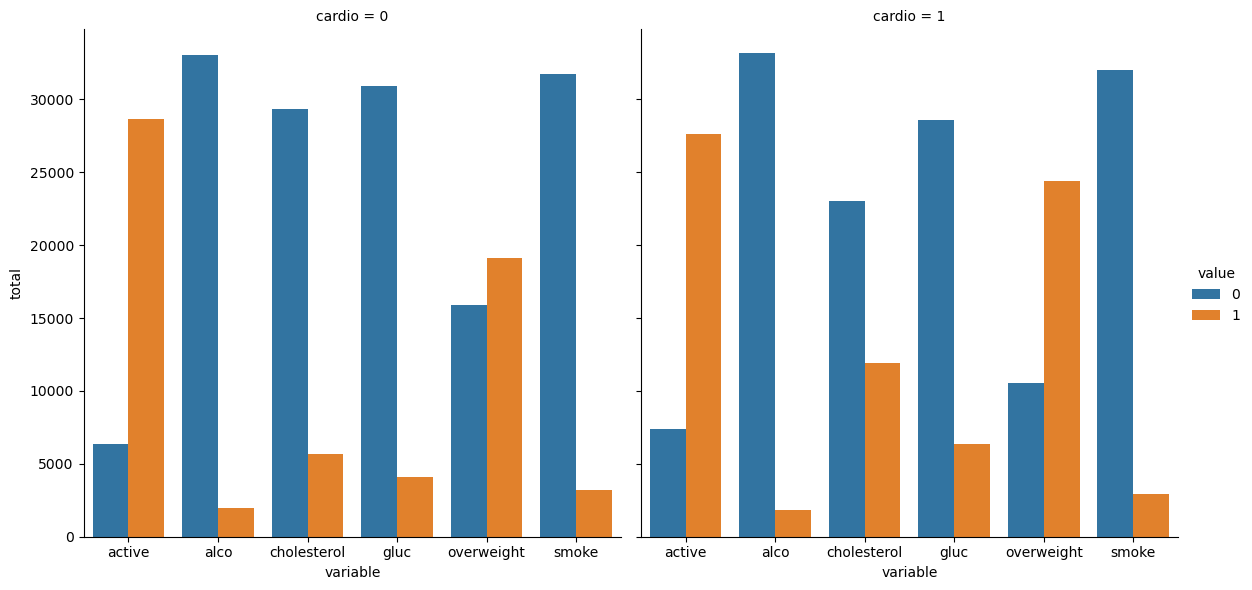

In [176]:
cat_plot = sns.catplot(data=df_cat, x='variable', y='counts', hue='value', kind='bar', height=6,
                      col='cardio')
cat_plot.set_axis_labels("variable", 'total')
cat_plot